<a href="https://colab.research.google.com/github/Ricard0000/Number_theory_Machine_Learning/blob/main/Number_theory_data_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**Generate data:** This code will generate numbers of interest to number theorists. This includes integers, primes, divisors, arithmetic functions. The later code will find retationships between these using Machine Learning techniques.

Integers less than N
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
List of prime numbers less than N
[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 13

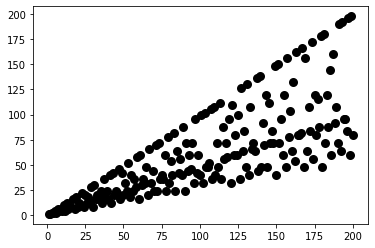

In [23]:
import sys
sys.path.insert(0, '../../Utilities/')
from mpl_toolkits.mplot3d import Axes3D
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io
from scipy.io import savemat
import math 


def divisors(N):
    A=np.zeros(N,dtype=np.int32)
    J=0
    for I in range(1,N+1):
        if np.mod(N,I)==0:
            A[J]=I
            J=J+1
    B=np.zeros(J,dtype=np.int32)
    for I in range(0,J):
        B[I]=A[I]
    if np.size(B)==2:
        p=B[1]
    else:
        p=0
    return A,p
    
def mobius(N,prime_list):
    J=0
    temp_list=0*prime_list
    for I in range(0,np.size(prime_list)):
        if np.mod(N,prime_list[I])==0:
            temp_list[J]=prime_list[I]
            J=J+1
    temp=1
    for I in range(0,J):
        temp=temp*temp_list[I]
    if N==temp:
        val=(-1)**J
    else:
        val=0
    return val

def Liouville(N,prime_list):
    J=0
    raise_power=0*prime_list
    for I in range(0,np.size(prime_list)):
        raise_power[I]=0
        if np.mod(N,prime_list[I])==0:
            while (np.mod(N,prime_list[I]**raise_power[I])==0):
                raise_power[I]=raise_power[I]+1
            raise_power[I]=raise_power[I]-1
        else:
            raise_power[I]=0
    temp=1
    for I in range(0,np.size(prime_list)):
        temp=((-1)**(raise_power[I]))*temp
    val=temp
    return val

def totient(N):
    J=0
    for I in range(0,N):
        if math.gcd(N,I)==1:
            J=J+1
    val=J
    return val

def sigma_alpha_func(N,d,alpha):#(definition: \sigma_{\alpha}(N)=\sum_{d|N} d^{\alpha})
    val=0
    for I in range(0,np.size(d[0,:])):
        val=val+d[N-1,I]**alpha
    return val


def mangolt_func(N,prime_list):
    J=0
    raise_power=0*prime_list
    for I in range(0,np.size(prime_list)):
        raise_power[I]=0
        if np.mod(N,prime_list[I])==0:
            while (np.mod(N,prime_list[I]**raise_power[I])==0):
                raise_power[I]=raise_power[I]+1
            raise_power[I]=raise_power[I]-1

    val1=0.0
    for I in range(0,np.size(prime_list)):
        if (N==prime_list[I]**raise_power[I]):
            val1=np.log(prime_list[I])
        else:
            val2=0.0
    val=max(val1,val2)
    return val




#find divisors of integers greater than 2 but less than or equal to N

N=200
int_list=np.zeros([N],dtype=np.int32)
p=np.zeros([N],dtype=np.int32)
mob=np.zeros([N],dtype=np.int32)
mob[0]=1
tot=np.zeros([N],dtype=np.int32)
tot[0]=1
lio=np.zeros([N],dtype=np.int32)
ident=np.zeros([N],dtype=np.int32)
sigma_alpha=np.zeros([N],dtype=np.int32)
mang=np.zeros([N],dtype=float)

#DATA FOR INTEGERS
for I in range(1,N+1):
    int_list[I-1]=I

#DATA FOR TOTIENT FUNCTION
for I in range(1,N+1):
    tot[I-1]=totient(I)



#DATA FOR DIVISORS

d=np.zeros([N,N],dtype=np.int32)
for I in range(1,N+1):
    temp,prime=divisors(I)
    for J in range(0,I):
        d[I-1,J]=temp[J]
    p[I-1]=prime
J=0
for I in range(1,N):
    if p[I-1]!=0:
        J=J+1
N_p=J
J=0
prime_list=np.zeros(N_p,dtype=np.int32)
for I in range(1,N):
    if p[I-1]!=0:
        prime_list[J]=p[I-1]
        J=J+1

#This is for more efficient generation of primes (no divisors)
"""
temp_list=np.zeros([N-1],dtype=np.int32)
for I in range(2,N+1):
    temp,prime=divisors(I)
    temp_list[I-2]=prime
J=0
for I in range(2,N):
    if temp_list[I-2]!=0:
        J=J+1
N_p=J
J=0
prime_list=np.zeros(N_p,dtype=np.int32)
for I in range(2,N):
    if temp_list[I-2]!=0:
        prime_list[J]=temp_list[I-2]
        J=J+1
int_plist=np.zeros(N_p,dtype=np.int32)
for I in range(2,N_p+2):
    int_plist[I-2]=I
"""


#DATA FOR MOBIUS FUNCTION
for I in range(2,N+1):
    mob[I-1]=mobius(I,prime_list)


#DATA FOR IDENTITY FUNCTION
ident[0]=1


#DATA for Liouville’s function
lio[0]=1
for I in range(2,N+1):
    lio[I-1]=Liouville(I,prime_list)


#DATA for Divisor functions (definition: \sigma_{\alpha}(N)=\sum_{d|N} d^{\alpha})

sigma_alpha[0]=1
alpha=1
for I in range(2,N+1):
    sigma_alpha[I-1]=sigma_alpha_func(I,d,alpha)

#DATA for Mangolt function
mang[0]=0.0
for I in range(2,N+1):
    mang[I-1]=mangolt_func(I,prime_list)


#Sum over divisors:
K=0
vect=np.zeros([N],dtype=np.int32)
for I in range(0,N):
    J=0
    while d[I,J]!=0:
        J=J+1
    vect[I]=J 
    
arith_func=np.zeros(N,dtype=np.int32)
for I in range(1,N+1):
    for J in range(0,vect[I-1]):
        arith_func[I-1]=arith_func[I-1]+mob[d[I-1,J]-1]*(I/d[I-1,J])

print('Integers less than N')
print(int_list)

print('List of prime numbers less than N')
print(prime_list)


print('Liovilles Function')
print(lio)


print('Mangolt Function')
print(mang)

"""
print('totient function up to N')
print(tot)

print('evaluating an arithmetic function up to N. (To be generalized later)')
print(arith_func)
"""

fig, axx = plt.subplots(1,1)
plt.scatter(int_list,tot, color='black', linewidth=3, label='Prediction')
plt.show()


In [13]:
d[7,:]

array([1, 2, 4, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

**Saving data for the following functions:**

1)Identify ($I(n)=1$ for $n=1$, $0$ else.)

2)Integers ($N(n)=n$)

3)Totient function ($\phi(n)$)

4)Mobius function ($\mu(n)$)

5)Prime numbers ($p$)

6)Divisors ($d(n)$, divisors of n)

7)Liouville's Function ($\lambda(n)=(-1)^{a_1+a_2+\cdots+a_m}$, $n=p_1^{a_1}\cdots p_{m}^{a_m}$)

8)Divisor Functions ($\sigma_{\alpha}(n)=\sum_{d|n}d^{\alpha}$)

9)Mangolt Function ($\Lambda(n)=\log(p)$, $n=p^m$, $0$ else.)

In [24]:
savemat('data_number_theory.mat',{'indentity':ident,'integers':int_list,'totient':tot, 'mobius':mob, 'primes':prime_list, 'divisors':d, 'liouville':lio, 'sigma_alpha':sigma_alpha, 'mangolt':mang})

In [25]:
data = scipy.io.loadmat('data_number_theory.mat')
indentity = data['indentity']
integers = data['integers']
totient = data['totient']
mobius = data['mobius']
primes = data['primes']
divisors = data['divisors']
liouville = data['liouville']
sigma_alpha = data['sigma_alpha']
mangolt = data['mangolt']